# Add additional data variables

In [1]:
import os
if 'notebooks' in os.getcwd(): os.chdir('../..')  # change to main directory
print('Working directory:', os.getcwd() )

Working directory: /scratch/snx3000/bp000429/adrian_sensorium


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import glob
from tqdm import tqdm
import datetime
import os

In [3]:
folders = glob.glob( "notebooks/data/static*/")
folders

['notebooks/data/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static27204-5-13-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/',
 'notebooks/data/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/']

Working on:  notebooks/data/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static27204-5-13-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/
Working on:  notebooks/data/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/


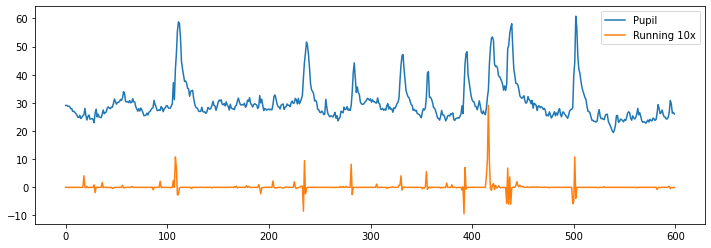

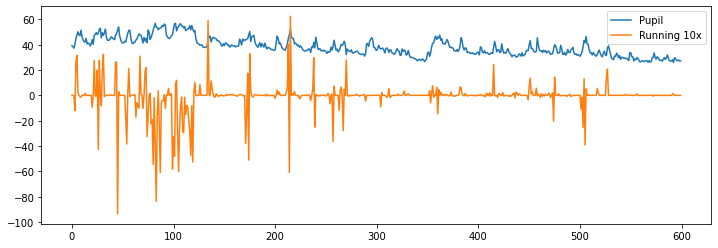

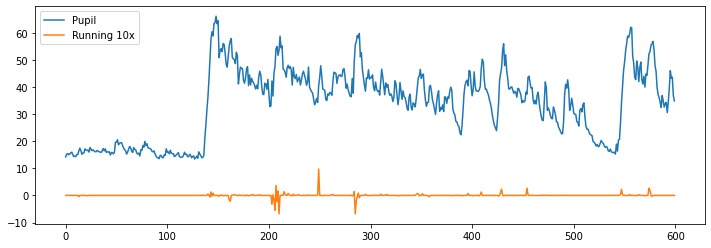

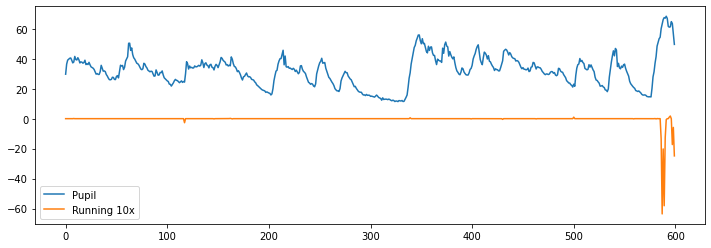

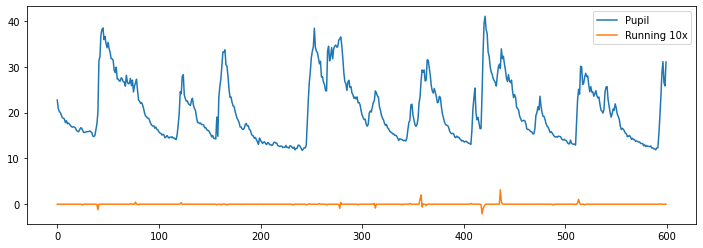

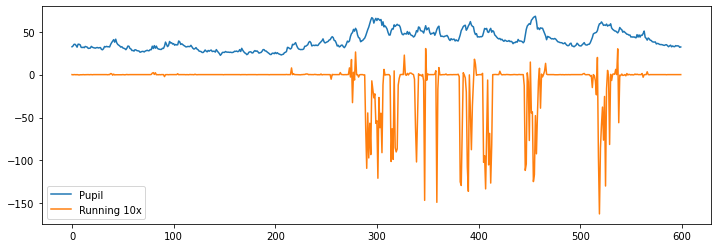

In [4]:
all_sorting = dict()

for folder in folders:
    print('Working on: ', folder)
    
    # read and sort timestamps
    ts_file =  '/meta/trials/frame_trial_ts.npy'
    ts_raw =  np.load( os.path.join(folder + ts_file ))
    
    ts = list()
    for string in ts_raw:
        t = datetime.datetime.strptime(string[11:-2], '%Y-%m-%d %H:%M:%S')
        ts.append( t )
    ts = np.array( ts ) 

    ts_argsort = np.argsort( ts )
    
    # save the trial_id and sorted_id as .npy arrays in merged_data
    nr_trials = len(ts_argsort)
    trial_id = np.arange(nr_trials, dtype=int)
    trial_id = np.expand_dims(trial_id, axis=1)  # transform to 2d array for batch loader
    
    sort_id = np.copy( ts_argsort )
    sort_id = np.expand_dims(sort_id, axis=1)  # transform to 2d array for batch loader
    
    np.save( os.path.join(folder, 'merged_data', 'trial_id.npy'), trial_id )
    np.save( os.path.join(folder, 'merged_data', 'sort_id.npy'), sort_id )
    
    # add sorting to dict to save the sorting for all keys together
    data_key = folder.split("static")[-1].split("-GrayImageNet")[0]
    all_sorting[data_key] = ts_argsort
    
    
    # read in behavior data and sort as sanity check
    behav_file = os.path.join(folder, 'merged_data/behavior.npy')
    behav_data = np.load( behav_file )
    sort_behav = behav_data[ts_argsort]
    
    plt.figure(figsize=(12,4))
    plt.plot( sort_behav[0:600, 0], label='Pupil' )
    plt.plot( sort_behav[0:600, 2] * 10, label='Running 10x' )
    plt.legend()

data_folder = os.path.dirname(folder[:-1])  # go back to main data directory
np.save( os.path.join( data_folder, 'dataset_sortings.npy'), all_sorting )